In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_diabetes

#data generation
X,Y=make_regression(n_samples=100,n_features=1,noise=25)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
class MyGD:

  def __init__(self,learning_rate=0.01,epochs=100):
    self.epochs=epochs
    self.learning_rate=learning_rate
    self.m=0
    self.b=0

  def fit(self,X,Y):

    for i in range(self.epochs):

      #finding slope
      loss_b=-2*sum(Y-X.ravel()*self.m-self.b)
      loss_m=-2*sum((Y-X.ravel()*self.m-self.b)*X.ravel())

      #update  U=U(old)-lr*loss
      self.m=self.m-self.learning_rate*loss_m
      self.b=self.b-self.learning_rate*loss_b


    print("slope",self.m)
    print("intercept",self.b)


  def predict(self,x_test):
    return self.m*x_test.ravel()+self.b





[80.22850534] 3.4777417380332496


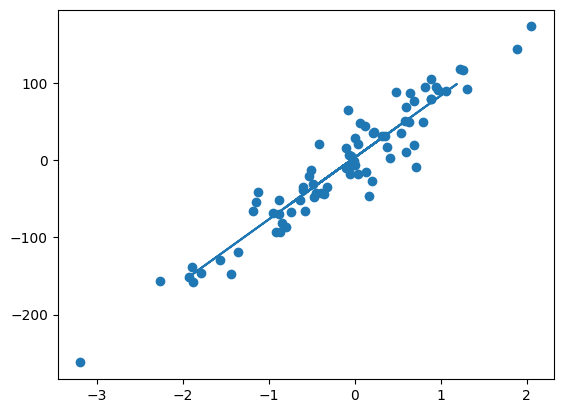

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print(lr.coef_,lr.intercept_)

plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred)
plt.show()


slope 80.22850533953005
intercept 3.477741738001136


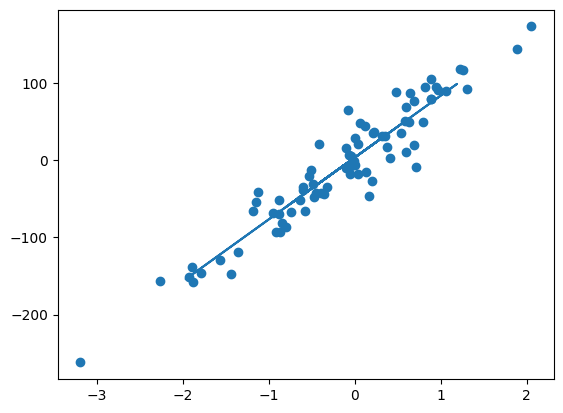

In [ ]:

gd=MyGD(learning_rate=0.001,epochs=200)
gd.fit(x_train,y_train)
y_pred=gd.predict(x_test)

plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred)

plt.show()



#Batch gradient descent for N-dimensional data

In [ ]:


class Ngd:

  def __init__(self,learning_rate=0.01,epochs=100):
    self.epochs=epochs
    self.learning_rate=learning_rate
    self.coffecients=None
    self.intercept=None


  def fit(self,X,Y):
    self.coffecients=np.ones(X.shape[1])
    self.intercept=0
    for i in range(self.epochs):

      #finding dervative wrt intercept and coffecients

      y_pred=X.dot(self.coffecients)+self.intercept   #(n,f).(f,1)
      inte_der=-2*np.mean(Y-y_pred)
      coff_der=-2*np.dot((Y-y_pred),X)/X.shape[0]

      #update  U=U(old)-lr*loss
      self.intercept=self.intercept-self.learning_rate*inte_der
      self.coffecients=self.coffecients-self.learning_rate*coff_der


    print("intercept",self.intercept)
    print("coffecients",self.coffecients)


  def predict(self,x_test):
    return np.dot(x_test,self.coffecients)+self.intercept






In [ ]:


X,Y = load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

lrn = LinearRegression()
lrn.fit(x_train,y_train)
print(lrn.intercept_,lrn.coef_)
print(mean_squared_error(y_test,lrn.predict(x_test)))


151.88331005254167 [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
3094.4566715660626


In [ ]:
#now start with our model


gd=Ngd(learning_rate=0.03,epochs=10000)
gd.fit(x_train,y_train)
y_pred=gd.predict(x_test)
print(mean_squared_error(y_test,y_pred))

intercept 152.08820659276566
coffecients [  36.60250776 -123.30684481  431.59390995  293.72865875  -13.93099448
  -78.02863433 -189.35155704  118.65360225  389.60207773  119.56884363]
3032.114749678652




#compare both coffecient values and intercept values




# stochastic gradient descent

it is differnt from batch gradient descent
here we update the coefficients by considering one instance



In [13]:

class Sgd:

  def __init__(self,learning_rate=0.01,epochs=100):
    self.epochs=epochs
    self.learning_rate=learning_rate
    self.coffecients=None
    self.intercept=None


  def fit(self,X,Y):
    self.coffecients=np.ones(X.shape[1])
    self.intercept=0
    for i in range(self.epochs):
      for j in range(X.shape[0]):

        idx=np.random.randint(0,X.shape[0])

        #finding dervative wrt intercept and coffecients

        y_pred=X[idx].dot(self.coffecients)+self.intercept   #(n,f).(f,1)

        inte_der=-2*np.mean(Y[idx]-y_pred)
        coff_der=-2*np.dot((Y[idx]-y_pred),X[idx])


        #update  U=U(old)-lr*loss
        self.intercept=self.intercept-self.learning_rate*inte_der
        self.coffecients=self.coffecients-self.learning_rate*coff_der




    print("intercept",self.intercept)
    print("coffecients",self.coffecients)


  def predict(self,x_test):
    return np.dot(x_test,self.coffecients)+self.intercept




In [14]:


X,Y = load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

sgdr=Sgd(learning_rate=0.02,epochs=50)
sgdr.fit(x_train,y_train)
y_pred=sgdr.predict(x_test)
print(mean_squared_error(y_test,y_pred))


intercept 156.61553992019182
coffecients [  22.78973434 -156.76531859  447.70769453  313.56252881  -22.46210376
  -86.0742354  -197.53019052  114.32722064  409.00770636  103.1249379 ]
3024.9188257007822




In above Batch gradient it takes 10000 epochs to get optimal coeffients but in sgd regressor it uses only 50 epcohs

and we have in built sgd regressor in sklearn also it uses stochastic GD.

In [19]:

from sklearn import linear_model

sgd_reg = linear_model.SGDRegressor(max_iter=50,learning_rate='constant',eta0=0.02)
sgd_reg.fit(x_train,y_train)
print(sgd_reg.intercept_,sgd_reg.coef_)
print(mean_squared_error(y_test,sgd_reg.predict(x_test)))

[157.1712751] [  55.98330167  -66.91991151  348.16388405  246.26225234   17.99522605
  -27.65787742 -172.46464448  128.69026933  315.91624972  129.07796869]
3154.8133927280583


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
